In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
with open('../data/teis_final_data.pickle', 'rb') as file:
    teis = pickle.load(file)

 A referral is considered a "successful" referral if it results in an Individualized Family Service Plan (IFSP). Are there referral sources that have had higher rates of successful referrals? You can determine whether a referral was successful by looking at whether the Initial IFSP Date column is filled in or whether the Child Phase column is equal to IFSP.

In [3]:
teis['Successful'] = ((teis['Child Phase'] == "IFSP") | (teis['Initial IFSP Date'].notnull()))

In [4]:
teis.head()

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active,Successful
0,104085,2007-07-07,2018-01-20,3850 days,DCS,Notification,Unable to contact,2010-01-25,933 days,NaN,...,Davidson,Competitive,Middle,2017-2018,2017.0,Jan,3.0,2018,I,False
1,350065,2013-10-15,2016-08-17,1037 days,PCP,Screening,Unable to contact,2016-08-31,1051 days,Steven Scarlett,...,Jackson,At-Risk,Middle,2016-2017,2016.0,Aug,1.0,2016,I,False
2,351755,2013-11-13,2016-07-12,972 days,Parent,Eligibility,Ineligible for Part C,2016-08-25,1016 days,Rene Bard,...,Madison,Transitional,Western,2016-2017,2016.0,Jul,1.0,2016,I,False
3,353800,2013-10-01,2016-09-14,1079 days,Parent,Notification,Referral less than 45 days,2016-09-15,1080 days,Jennifer Terranera - 45 days,...,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I,False
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I,True


In [29]:
teisyearly = teis.groupby(['Notification Year', 'POE'])['Successful'].mean()
teisyearly.head(25)

Notification Year  POE
2016               ET     0.305758
                   FT     0.370166
                   GN     0.336174
                   MD     0.336792
                   NW     0.263736
                   SC     0.423201
                   SE     0.462687
                   SW     0.398287
                   UC     0.554662
2017               ET     0.353014
                   FT     0.384979
                   GN     0.363346
                   MD     0.330809
                   NW     0.351107
                   SC     0.446368
                   SE     0.446809
                   SW     0.398969
                   UC     0.561840
2018               ET     0.354829
                   FT     0.400193
                   GN     0.358958
                   MD     0.336993
                   NW     0.345109
                   SC     0.501062
                   SE     0.401484
Name: Successful, dtype: float64

In [30]:
print(teisyearly.to_string())

Notification Year  POE
2016               ET     0.305758
                   FT     0.370166
                   GN     0.336174
                   MD     0.336792
                   NW     0.263736
                   SC     0.423201
                   SE     0.462687
                   SW     0.398287
                   UC     0.554662
2017               ET     0.353014
                   FT     0.384979
                   GN     0.363346
                   MD     0.330809
                   NW     0.351107
                   SC     0.446368
                   SE     0.446809
                   SW     0.398969
                   UC     0.561840
2018               ET     0.354829
                   FT     0.400193
                   GN     0.358958
                   MD     0.336993
                   NW     0.345109
                   SC     0.501062
                   SE     0.401484
                   SW     0.440183
                   UC     0.517502
2019               ET     0.3645

In [5]:
total_referrals = teis.groupby(['Referral Source Type Name'])['Successful'].count()
total_referrals

Referral Source Type Name
CAPTA                                2
Child Care provider                430
Community/Child Find Activity      385
DCS                              25716
DHS                                 12
DMRS                                 1
Dept. of Health                   3683
EIRA                               352
Early Head Start/Head Start       1026
Family and Friends                 524
Foster Parent                      425
Hospital                          7275
LEA                                 16
NHS                                222
NICU                              3270
OT                                  86
Other                             2606
Other Health Care Provider        2353
PCP                              43928
PICU                                25
PT                                 618
Parent                           21919
Speech Therapist                   646
TIPS                                 3
Name: Successful, dtype: int64

In [6]:
total_referrals_successful = teis.groupby(['Referral Source Type Name'])['Successful'].sum()
total_referrals_successful

Referral Source Type Name
CAPTA                                0
Child Care provider                175
Community/Child Find Activity      155
DCS                               4502
DHS                                  3
DMRS                                 1
Dept. of Health                   1381
EIRA                               170
Early Head Start/Head Start        423
Family and Friends                 280
Foster Parent                      262
Hospital                          2902
LEA                                  6
NHS                                 69
NICU                              1154
OT                                  44
Other                             1179
Other Health Care Provider        1166
PCP                              18298
PICU                                14
PT                                 371
Parent                           12575
Speech Therapist                   387
TIPS                                 2
Name: Successful, dtype: int64

In [7]:
tot_ref = pd.merge(total_referrals, total_referrals_successful, on='Referral Source Type Name', how='left').rename(columns = {'Successful_x' : 'Total Referrals', 'Successful_y' : 'Total Successful Referrals'})
tot_ref

,Total Referrals,Total Successful Referrals
Referral Source Type Name,,
CAPTA,2,0
Child Care provider,430,175
Community/Child Find Activity,385,155
DCS,25716,4502
DHS,12,3
DMRS,1,1
Dept. of Health,3683,1381
EIRA,352,170
Early Head Start/Head Start,1026,423


In [8]:
tot_ref['Percentage Success'] = ((tot_ref['Total Successful Referrals']/tot_ref['Total Referrals']) * 100).round(decimals =2)
tot_ref = tot_ref.reset_index()
tot_ref

,Referral Source Type Name,Total Referrals,Total Successful Referrals,Percentage Success
0,CAPTA,2,0,0.00
1,Child Care provider,430,175,40.70
2,Community/Child Find Activity,385,155,40.26
3,DCS,25716,4502,17.51
4,DHS,12,3,25.00
5,DMRS,1,1,100.00
6,Dept. of Health,3683,1381,37.50
7,EIRA,352,170,48.30
8,Early Head Start/Head Start,1026,423,41.23
9,Family and Friends,524,280,53.44


In [9]:
teis2 = teis.groupby(['Referral Source Type Name'])['Successful'].mean()

Referral Source Type Name
CAPTA                            0.000000
Child Care provider              0.406977
Community/Child Find Activity    0.402597
DCS                              0.175066
DHS                              0.250000
DMRS                             1.000000
Dept. of Health                  0.374966
EIRA                             0.482955
Early Head Start/Head Start      0.412281
Family and Friends               0.534351
Foster Parent                    0.616471
Hospital                         0.398900
LEA                              0.375000
NHS                              0.310811
NICU                             0.352905
OT                               0.511628
Other                            0.452417
Other Health Care Provider       0.495538
PCP                              0.416545
PICU                             0.560000
PT                               0.600324
Parent                           0.573703
Speech Therapist                 0.599071
TIPS    

In [10]:
tot_ref = tot_ref.sort_values(by = 'Total Referrals', ascending = False)
tot_ref = tot_ref[tot_ref['Total Referrals'] > 1000]
tot_ref.reset_index(drop=True)

,Referral Source Type Name,Total Referrals,Total Successful Referrals,Percentage Success
0,PCP,43928,18298,41.65
1,DCS,25716,4502,17.51
2,Parent,21919,12575,57.37
3,Hospital,7275,2902,39.89
4,Dept. of Health,3683,1381,37.50
5,NICU,3270,1154,35.29
6,Other,2606,1179,45.24
7,Other Health Care Provider,2353,1166,49.55
8,Early Head Start/Head Start,1026,423,41.23


In [11]:
#plt.bar(tot_ref['Referral Source Type Name'], tot_ref['Percentage Success'])
#plt.show()

C:\Users\colin\AppData\Local\Temp\ipykernel_13016\565434494.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


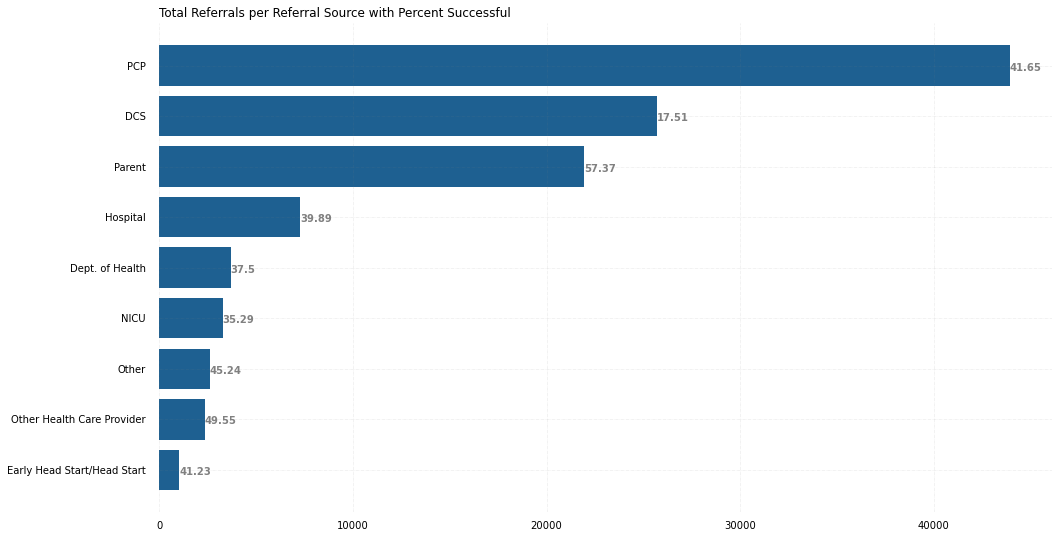

In [12]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(tot_ref['Referral Source Type Name'], tot_ref['Total Referrals'], color = '#1E6091')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for counter, i in enumerate(ax.patches):
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             #str(round((i.get_width()), 2)),
             str(tot_ref['Percentage Success'].values[counter]),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Total Referrals per Referral Source with Percent Successful',
             loc ='left', )
 
# Show Plot
plt.show()
fig.savefig('../data/first.png', dpi='figure', format='png', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto', transparent=True,
        backend=None
       )

In [13]:
tot_ref2 = tot_ref.sort_values(by = ['Percentage Success'], ascending=False)
tot_ref2

,Referral Source Type Name,Total Referrals,Total Successful Referrals,Percentage Success
21,Parent,21919,12575,57.37
17,Other Health Care Provider,2353,1166,49.55
16,Other,2606,1179,45.24
18,PCP,43928,18298,41.65
8,Early Head Start/Head Start,1026,423,41.23
11,Hospital,7275,2902,39.89
6,Dept. of Health,3683,1381,37.50
14,NICU,3270,1154,35.29
3,DCS,25716,4502,17.51


In [16]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(tot_ref2['Referral Source Type Name'], tot_ref2['Total Referrals'], color = '#1E6091')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for counter, i in enumerate(ax.patches):
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             #str(round((i.get_width()), 2)),
             str(tot_ref2['Percentage Success'].values[counter]),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Total Referrals per Referral Source with Percentage Success',
             loc ='left', )
 
# Show Plot
plt.show()
fig.savefig('../data/totalreferralpersourcewithpercent1.png', dpi='figure', format='png', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto', transparent=True
        backend=None
       )

SyntaxError: invalid syntax (3125706886.py, line 44)

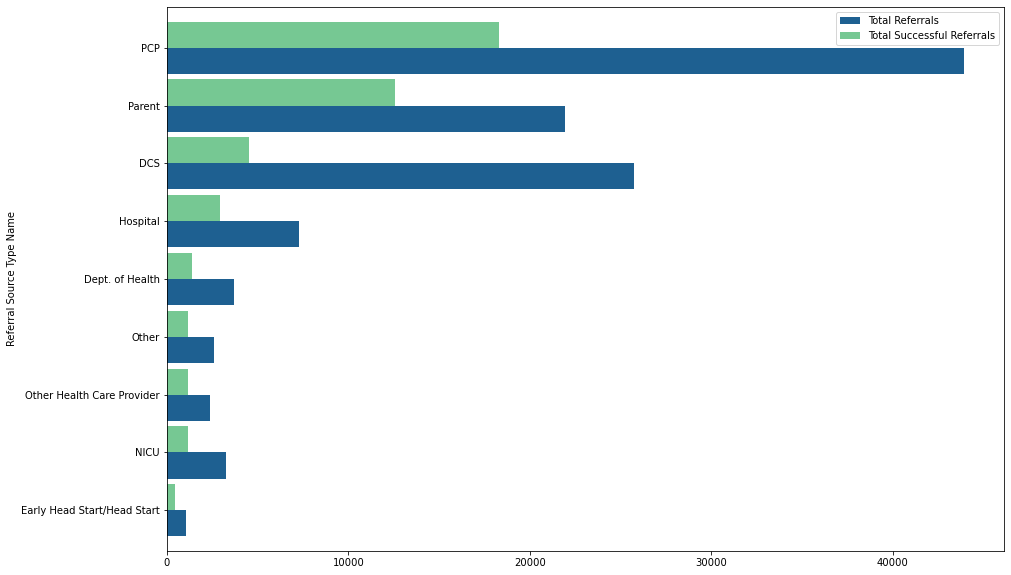

In [17]:
tot_ref.sort_values(by = 'Total Successful Referrals').plot(x='Referral Source Type Name',
                y = ['Total Referrals', 'Total Successful Referrals'], kind = 'barh', figsize = (15,10), width = .9, color = ['#1E6091', '#76C893'])

plt.savefig('../data/adfgsdh.png', dpi='figure', format='png', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto', transparent=True,
        backend=None
       )